In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Data_augmentation(object):
    def __init__(self, img):
        self.img = img
        img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_cvt)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()

    def crop(self):
        img_crop = self.img[0:100, 0:200]
        img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
        plt.imshow(img_crop)
        plt.axis('off')
        plt.title('img_crop')
        plt.show()
        return img_crop
    
    def random_light_color(self):
    # brightness
        B, G, R = cv2.split(self.img)  
        b_rand = random.randint(-50, 50)
        if b_rand == 0:
            pass
        elif b_rand > 0:
            #让B这个矩阵（图像）中 凡是>lim的元素都赋值为255，
            #目的是怕 它们加上g_rand以后会超过255，就越界了
            #B[B > lim] 表示一个 保留大于lim的元素不变而把其他元素置为0的矩阵，
            #矩阵大小与B相同
            lim = 255 - b_rand              
            B[B > lim] = 255
            B[B <= lim] = (b_rand + B[B <= lim]).astype(self.img.dtype)
        elif b_rand < 0:
            lim = 0 - b_rand
            B[B < lim] = 0
            B[B >= lim] = (b_rand + B[B >= lim]).astype(self.img.dtype)
        
        g_rand = random.randint(-50, 50)
        if g_rand == 0:
            pass
        elif g_rand > 0:
            lim = 255 - g_rand
            G[G > lim] = 255
            G[G <= lim] = (g_rand + G[G <= lim]).astype(self.img.dtype)
        elif g_rand < 0:
            lim = 0 - g_rand
            G[G < lim] = 0
            G[G >= lim] = (g_rand + G[G >= lim]).astype(self.img.dtype)
    
        r_rand = random.randint(-50,50)
        if r_rand == 0:
            pass
        elif r_rand > 0:
            lim = 255 - r_rand
            R[R > lim] = 255
            R[R <= lim] = (r_rand + R[R <= lim]).astype(self.img.dtype)
        elif r_rand < 0:
            lim = 0 - r_rand
            R[R < lim] = 0
            R[R >= lim] = (r_rand + R[R >= lim]).astype(self.img.dtype)
    
        img_merge = cv2.merge((B, G, R))
        # img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img_merge
    
    def random_color(self):
        img_random_color = self.random_light_color()
        img_random_color = cv2.cvtColor(img_random_color, cv2.COLOR_BGR2RGB)
        plt.imshow(img_random_color)
        plt.axis('off')
        plt.title('img_change_color')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()
        return img_random_color
    
    def adjust_gamma(self, gamma):
        # gamma校正之后，原来线性，变成曲线，拉伸关系
        invGamma = 1.0/gamma      
        table = []
        for i in range(256):
            table.append(((i / 255.0) ** invGamma) * 255)
        table = np.array(table).astype("uint8")
        return cv2.LUT(self.img, table)
    
    def brighter(self, gamma):
        img_brighter = self.adjust_gamma(gamma)
        img_brighter = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2RGB)
        plt.imshow(img_brighter)
        plt.axis('off')
        plt.title('img_brighter')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()
        return img_brighter
    
    def histogram(self):
        #plt.hist(self.img.flatten(), 256, [0, 256], color = 'r')
        img_yuv = cv2.cvtColor(self.img, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])    # only for 1 channel
        #cv2.imshow('img_yuv', img_yuv)         img_yuv y:明亮度 u:色度 v:饱和度
        #Y, U, V = cv2.split(img_yuv)
        #cv2.imshow('Y', Y)
        #cv2.imshow('U', U)
        #cv2.imshow('V', V)
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)  # y:luminance(明亮度)， u&v: 色度饱和度
        img_output = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
        plt.imshow(img_output)
        plt.axis('off')
        plt.title('img_histogram')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()
        return img_output
    
    def rotation(self, angle):
        M = cv2.getRotationMatrix2D((self.img.shape[1] / 2, self.img.shape[0] / 2), angle, 1)
        # center, angle, scale
        img_rotate = cv2.warpAffine(self.img, M, (self.img.shape[1], self.img.shape[0]))
        img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rotate)
        plt.axis('off')
        plt.title('img_rotate')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_rotate')
        plt.show()
        return img_rotate
    
    def similarity_transform(self, angle, scale):
        M = cv2.getRotationMatrix2D((self.img.shape[1] / 2, self.img.shape[0] / 2), angle, scale)
        # center, angle, scale
        img_similarity = cv2.warpAffine(self.img, M, (self.img.shape[1], self.img.shape[0]))
        img_similarity = cv2.cvtColor(img_similarity, cv2.COLOR_BGR2RGB)
        plt.imshow(img_similarity)
        plt.axis('off')
        plt.title('img_similarity_transform')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()
        return img_similarity
    
    def affine_transform(self):
        rows, cols, ch = self.img.shape
        pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows-1]])
        pts2 = np.float32([[cols * 2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols *0.1, rows * 0.9]])

        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(self.img, M, (cols, rows))
        dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
        plt.imshow(dst)
        plt.axis('off')
        plt.title('img_affine_transform')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()
        return dst
    
    def random_warp(self, row, col):
        height, width, channels = self.img.shape
    
        #warp:
        random_margin = 60
        x1 = random.randint(-random_margin, random_margin)
        y1 = random.randint(-random_margin, random_margin)
        x2 = random.randint(width - random_margin - 1, width - 1)
        y2 = random.randint(-random_margin, random_margin)
        x3 = random.randint(width - random_margin - 1, width - 1)
        y3 = random.randint(height - random_margin - 1, height - 1)
        x4 = random.randint(-random_margin, random_margin)
        y4 = random.randint(height - random_margin - 1, height - 1)

        dx1 = random.randint(-random_margin, random_margin)
        dy1 = random.randint(-random_margin, random_margin)
        dx2 = random.randint(width - random_margin - 1, width - 1)
        dy2 = random.randint(-random_margin, random_margin)
        dx3 = random.randint(width - random_margin - 1, width - 1)
        dy3 = random.randint(height - random_margin - 1, height - 1)
        dx4 = random.randint(-random_margin, random_margin)
        dy4 = random.randint(height - random_margin - 1, height - 1)

        pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
        M_warp = cv2.getPerspectiveTransform(pts1, pts2)
        img_warp = cv2.warpPerspective(img, M_warp, (width, height))
        return M_warp, img_warp
    
    def random_perspective_transform(self):
        M_warp, img_perspective = self.random_warp(self.img.shape[0], self.img.shape[1])
        img_perspective = cv2.cvtColor(img_perspective, cv2.COLOR_BGR2RGB)
        plt.imshow(img_perspective)
        plt.axis('off')
        plt.title('img_perspective_transform')
        plt.show()
        img_ori = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_ori)
        plt.axis('off')
        plt.title('img_ori')
        plt.show()
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_perspective
      

In [3]:
img = cv2.imread('D:\pythonworkplace\AI_CV\week1\Lenna.png')

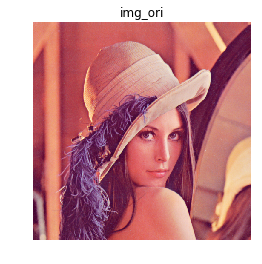

In [4]:
img_augmentation = Data_augmentation(img)

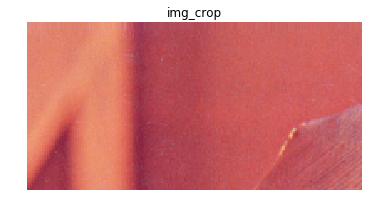

In [5]:
img_crop = img_augmentation.crop()

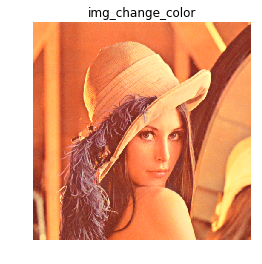

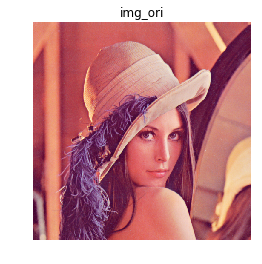

In [6]:
img_random_color = img_augmentation.random_color()

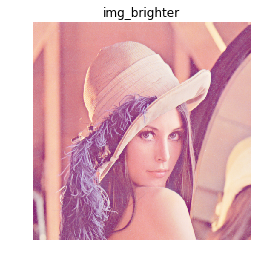

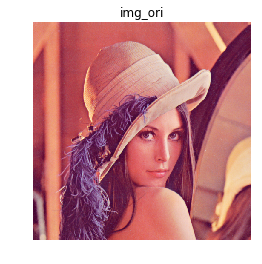

In [7]:
img_brighter = img_augmentation.brighter(2)

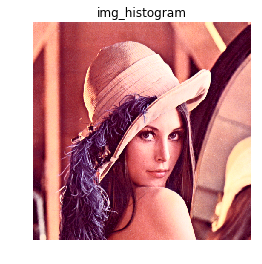

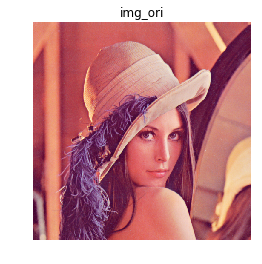

In [8]:
img_histogram = img_augmentation.histogram()

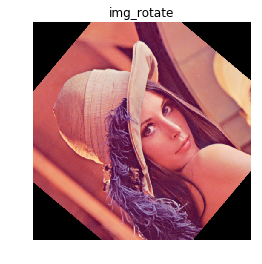

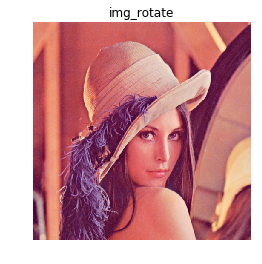

In [9]:
img_rotate = img_augmentation.rotation(50)

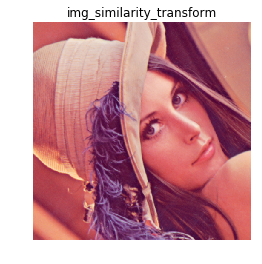

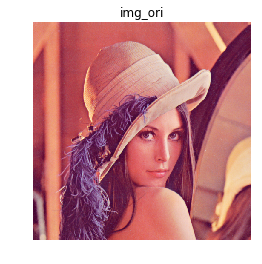

In [10]:
img_similarity = img_augmentation.similarity_transform(50, 1.5)

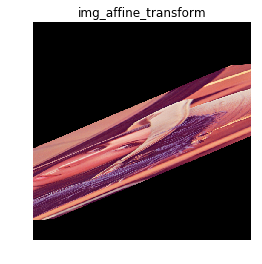

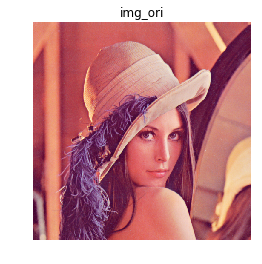

In [11]:
img_affine = img_augmentation.affine_transform()

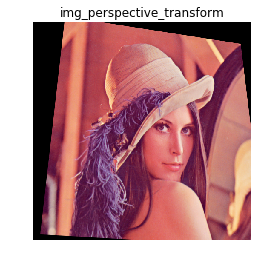

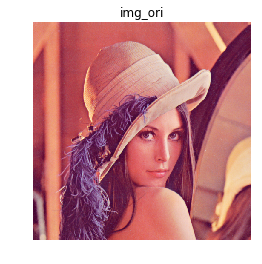

In [ ]:
img_perspective = img_augmentation.random_perspective_transform()